# Introducción

Según estimaciones de diferentes expertos, las fases de **entendimiento del negocio, de los datos y su preparación** pueden ocupar alrededor del $80\%$ del tiempo de desarrollo de un proyecto de minería de datos; son, por lo tanto, fases críticas dentro de la metodología **CRISP-DM**.

Desafortunadamente, con frecuencia, la urgencia de los equipos de ciencia de datos por aplicar técnicas estadísticas y generar resultados provoca que estas fases se desarrollen de forma descuidada comprometiendo el alcance del proyecto.

Una vez que se han identificado los objetivos que la organización plantea para el proyecto y las fuentes de datos necesarias para alcanzarlos, el equipo de ciencia de datos debe enfocarse en obtener los datos, explorarlos y **prepararlos** para aplicar sobre ellos técnicas de modelado. Esta última tarea debe ser enfatizada pues la mayoría de las aplicaciones de la minería de datos se realizan sobre conjuntos que no están estructurados como texto, imágenes o registros de actividad de usuarios en un sitio web. 

# Preparación de datos

Considerando a la metodología CRISP-DM y lo descrito por Aggarwal en el segundo capítulo de su libro *Data Mining* algunas de las tareas más importantes que se desarrollan en la fase de preparación de datos son:

* Extracción de características.
* Limpieza de datos.
* Selección, reducción de datos y dimensionalidad.

En este documento exploraremos la tarea de extracción de características, mientras que a lo largo de las siguientes clases revisaremos el resto de las tareas.


## Extracción de características

Hemos ya descrito que las aplicaciones reales de la minería de datos se dan sobre conjuntos no-estructurados como texto, imágenes, audio, registros de actividad en la web y grafos. Desafortunadamente las metodologías estadísticas no funcionan de forma directa sobre este tipo de datos, por lo cual, es necesario extraer nuevas características derivadas de las originales.

En esta sección ejemplificaremos algunas de las técnicas de extracción de características para diferentes tipos de datos no estructurados.

### Documentos.

Una de las transformaciones más frecuentes para documentos compuestos por texto es la construcción de la matriz **documento-término**. La estructura de esta matriz es tal que cada fila se asocia a un documento diferente (puede ser un simple comentario generado en un sitio web) y cada columna a un término (palabra) diferente. De manera que el valor de la celda $M_{ij}$ indica la frecuencia con la que el término $j$-ésimo aparece en el documento $i$-ésimo.

$$\color{blue}{M_{ij} = \text{Total de veces que aparece el término j-ésimo en el documento i-ésimo}}$$

Considera los siguientes comentarios (documentos) guardados en la matriz *corpus*.

In [23]:
corpus = [
            'aprender a manipular grandes volumenes de datos', 
            'aprender un correcto uso de la mineria de datos'
         ]

El vocabulario definido por ambos documentos es el siguiente conjunto:

$$\{\text{aprender}, \text{manipular}, \text{grandes}, \text{volumenes}, \text{datos}, \text{correcto}, \text{uso}, \text{mineria}\}$$

Observa que hemos eliminado algunos términos poco relevantes. Hemos eliminado también acentos para facilitar el proceso de comentarios (no todos los autores de documentos respetan la ortografía).

Para este ejemplo, la matriz documento término  tiene la siguiente estructura:

$$
\begin{matrix}
  \hline
    \text{aprender} & \text{manipular} & \text{grandes} & \text{volumenes} & \text{datos} & \text{correcto} & \text{uso} & \text{mineria} \\
  \hline
  1 & 1 & 1 & 1 & 1 & 0 & 0 & 0\\
  1 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\ 
\end{matrix}
$$





En la práctica, construimos la matriz documento-término con ayuda alguna herramienta computacional como $\texttt{sklearn}$:

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=["a","de","un","la"]) #cuenta la frecuencia de ocurrencia de cada término en cada documento
X = vectorizer.fit_transform(corpus) 

La frecuencia con la que aparece cada palabra (término) se convierte en una característica de cada documento. Cada palabra se asocia con una **columna** de la matriz.

In [25]:
#columnas
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

['aprender' 'correcto' 'datos' 'grandes' 'manipular' 'mineria' 'uso'
 'volumenes']
8



Cada documento se asocia con una fila y cada celda de la matriz indica el total de apariciones de algún término en el documento:

In [33]:
import pandas as pd

df = pd.DataFrame(X.toarray())

df.columns = vectorizer.get_feature_names_out()
df.index = ["Comentario 1", "Comentario 2"]

df

,aprender,correcto,datos,grandes,manipular,mineria,uso,volumenes
Comentario 1,1,0,1,1,1,0,0,1
Comentario 2,1,1,1,0,0,1,1,0


Observa que con esta transformación hemos logrado representar a cada documento como un vector.

### Series de tiempo 

Existen diferentes opciones para extraer nuevas características en una serie de tiempo. Una de ellas es la **transformada discreta de Fourier**. Esta transformación permite construir una representación alternativa muy útil para procesar señales y para compactar información.

La transformada discreta de Fourier es equivalente a una serie en la que cada témino es un número complejo:

$$X[k] = \sum_{t=0}^{N-1}x[t]e^{-2\pi i  t}$$

En la siguiente celda se muestra una serie de tiempo correspondiente a una señal periódica.

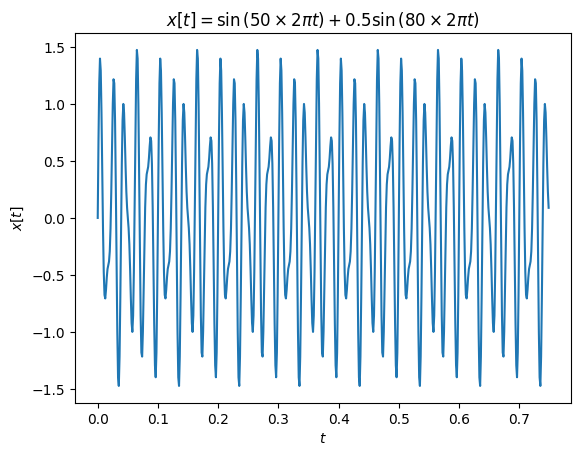

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

plt.plot(x,y)
plt.xlabel("$t$")
plt.ylabel("$x[t]$")
plt.title("$x[t] = \sin{(50 \\times 2\pi t)+0.5\sin{(80 \\times 2\pi t)}}$")
plt.show()

La transformada discreta de Fourier permite identificar las frecuencias de las componentes básicas de la señal periódica. Nota los picos en $k = 50$ y $k = 80$

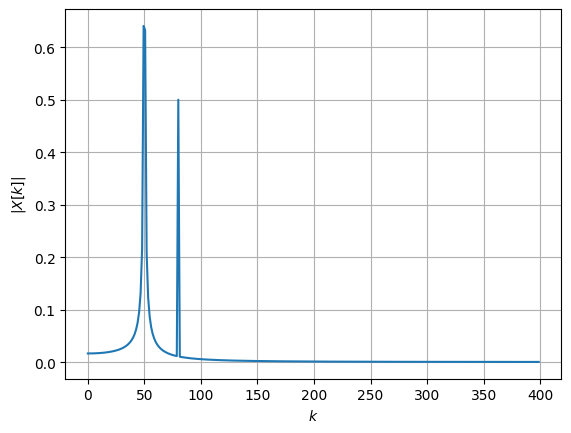

In [28]:
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("$k$")
plt.ylabel("$|X[k]|$")
plt.show()

Observa que la transformada de Fourier contiene pocos elementos con valores importantes, lo cual se aprovecha para comprimir señales.

Otras transformaciones que se pueden aplicar a las series de tiempo son las denominadas **ondeletas** o **wavelets**.

Estas transformaciones pueden aplicarse también a **imágenes**, las cuales pueden considerarse una extensión de las series de tiempo a un espacio bidimensional. 


## Imágenes

Además de las transformadas de Fourier o las wavelets, puede obtenerse una representación alternativa de una imagen a partir del histograma de frecuencias de sus tonos de gris o de cada una de las bandas de colores como puede observarse en la siguientes celdas.

In [29]:
import cv2

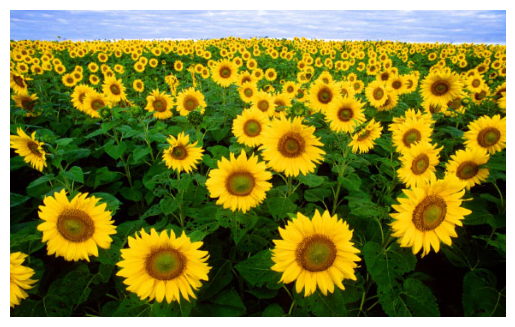

In [30]:
l = cv2.imread("Sunflowers.jpg")

plt.imshow(cv2.cvtColor(l, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [31]:
#histograma de frecuencia de la banda roja

h = np.histogram(l[:,:,2], bins=16)


h[0]

array([36480, 27786, 16986, 11495,  7118,  4794,  4431,  5373,  6975,
        7074,  6801,  8289, 10306,  9002, 10060, 35250], dtype=int64)

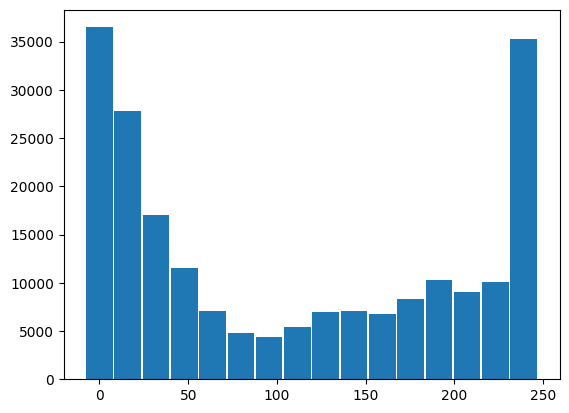

In [32]:
plt.bar(h[1][0:-1], h[0], width = 15)
plt.show()

# Conclusión

En las aplicaciones de minería de datos es necesario transformar conjuntos de datos no estructurados para posibilitar la aplicación de técnicas de modelado y extraer de ellas información valiosa para la toma de decisiones.

En este documento revisamos cómo extraer características de texto, series de tiempo e imágenes. A lo largo del curso retomaremos algunas de estas técnicas para aplicaciones específicas como la minería de texto. 

<font color="red">Actividad </font>

1. Construye un vector que contenga las respuestas a la pregunta "¿Qué expectativas tienes acerca de la clase de Minería de Datos?" desdque planteamos en Google Classroom.
2. Construye la matriz documento término del corpus del punto anterior. Asegúrate de eliminar palabras poco relevantes.

In [35]:
corpus = [
    'Mis expectativas sobre el curso es tener los conocimientos necesarios para manejar los datos de tal manera que si este entrenando un modelo con diferentes tipos de datos, sea capaz de manejarlos y transformalos sin ningun problema',
    'Lo que espero aprender es saber manejar grandes datos para mejorar esas transformaciones y me beneficie en mejores resultados.',
    'Aprender varias técnicas de minería de datos y descubrir herramientas que nos ayuden a facilitar el procesamiento de los datos.',
    'Tengo expectativas de que hacer con los datos que tengamos y con ellos hacer predicciones y resolver el problema que se requiera',
    'Espero aprender más acerca de la recolección de datos y técnicas de limpieza de datos'
]

In [42]:
vectorizer = CountVectorizer(stop_words=["a","de","un","la","y","lo","que","los","este","en","el","ellos","mas","mis","nos","me","para",'se', 'sea',  'si', 'sin' 'sobre', 'tal', 'tener','es', 'con', 'esas', 'más', 'sin'])
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

['acerca' 'aprender' 'ayuden' 'beneficie' 'capaz' 'conocimientos' 'curso'
 'datos' 'descubrir' 'diferentes' 'entrenando' 'espero' 'expectativas'
 'facilitar' 'grandes' 'hacer' 'herramientas' 'limpieza' 'manejar'
 'manejarlos' 'manera' 'mejorar' 'mejores' 'minería' 'modelo' 'necesarios'
 'ningun' 'predicciones' 'problema' 'procesamiento' 'recolección'
 'requiera' 'resolver' 'resultados' 'saber' 'sobre' 'tengamos' 'tengo'
 'tipos' 'transformaciones' 'transformalos' 'técnicas' 'varias']
43


In [45]:
df = pd.DataFrame(X.toarray())

df.columns = vectorizer.get_feature_names_out()
df.index = ["Comentario 1", "Comentario 2", "Comentario 3", "Comentario 4", "Comentario 5"]
df

,acerca,aprender,ayuden,beneficie,capaz,conocimientos,curso,datos,descubrir,diferentes,...,resultados,saber,sobre,tengamos,tengo,tipos,transformaciones,transformalos,técnicas,varias
Comentario 1,0,0,0,0,1,1,1,2,0,1,...,0,0,1,0,0,1,0,1,0,0
Comentario 2,0,1,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
Comentario 3,0,1,1,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,1,1
Comentario 4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
Comentario 5,1,1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
